In [1]:
import numpy as np
import pandas as pd
import re


In [2]:
orders = pd.read_csv('./data/Orders.csv')

In [3]:
orders['Profit'] = orders['Profit'].apply(lambda x: float(re.sub("[$,]","",x)))

In [4]:
orders['Sales'] = orders['Sales'].apply(lambda x: float(re.sub("[$,]","",x)))

In [5]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [6]:
import datetime

In [7]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'],format="%m/%d/%y")

In [8]:
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'],format="%m/%d/%y")

In [9]:
orders['month'] = orders['Ship.Date'].dt.month

In [10]:
orders['year'] = orders['Ship.Date'].dt.year

In [11]:
inventory = orders.groupby(['year','month'])['Quantity'].sum()

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

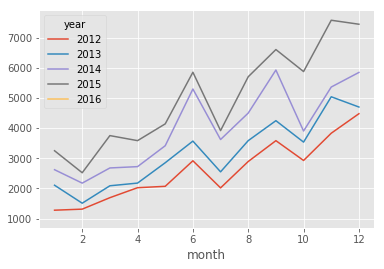

In [13]:
orders.groupby(['month','year']).sum()['Quantity'].unstack().plot()

Trends are similar across the years.
Increasing each month except July and Octuber.

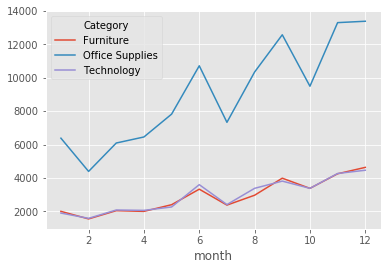

In [14]:
orders.groupby(['month','Category']).sum()['Quantity'].unstack().plot()

Trends are similar across the categories.

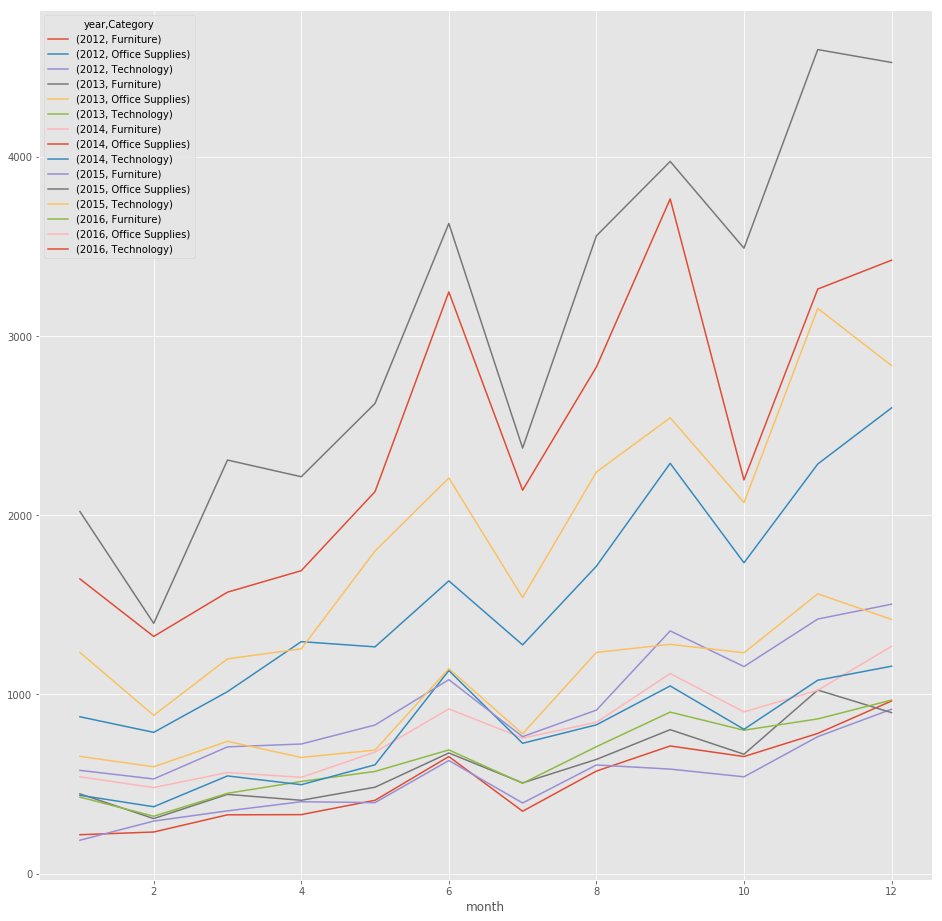

In [15]:
fig, ax = plt.subplots(figsize=(16,16))
orders.groupby(['month','Category','year']).sum()['Quantity'].unstack().unstack().plot(ax=ax)
# This plot is too messy.

In [16]:
returns = pd.read_csv('./data/Returns.csv')

In [17]:
collist = list(returns.columns)
collist[1]='Order.ID'
returns.columns=collist

In [18]:
merged = orders.merge(returns,how='left',on='Order.ID')

In [19]:
merged.loc[merged.Returned=='Yes'].groupby(['year']).sum()['Profit']

year
2012    17284.46
2013     9413.48
2014    17293.76
2015    17178.85
2016      200.20
Name: Profit, dtype: float64

In [20]:
customer=merged.loc[merged.Returned=='Yes'].groupby(['Customer.ID','Customer.Name']).count()[['Order.ID']]

In [21]:
customer.loc[customer['Order.ID']>1].shape[0]

547

In [22]:
customer.loc[customer['Order.ID']>5].shape[0]

46

In [23]:
merged['Returned'] = merged['Returned'].apply(lambda x: 1 if x=='Yes' else 0)

In [28]:
merged.groupby(['Region_x']).mean()[['Returned']].sort_values(by='Returned',ascending=False)

,Returned
Region_x,
Western US,0.055261
Eastern Asia,0.055181
Southern Europe,0.053005
Southern Africa,0.052301
Southern US,0.051235
Eastern US,0.047051
Southeastern Asia,0.044743
South America,0.044511
Western Asia,0.044262


In [25]:
merged.groupby(['Category']).mean()[['Returned']].sort_values(by='Returned',ascending=False)

,Returned
Category,
Technology,0.043881
Furniture,0.043306
Office Supplies,0.043082


In [26]:
merged.groupby(['Sub.Category']).mean()[['Returned']].sort_values(by='Returned',ascending=False)

,Returned
Sub.Category,
Labels,0.052672
Tables,0.047619
Accessories,0.044878
Art,0.044613
Copiers,0.044534
Binders,0.043768
Phones,0.043193
Bookcases,0.043136
Paper,0.042955
